In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

# Data location

In [5]:
data_path = "data/clean_data.csv"

# Load data

In [6]:
df = pd.read_csv(data_path)

In [7]:
df

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448.0,1.0,195.0,39.0,106.0,70.0,0.0,0.0,26.970,0.0,...,1.0,0.0,8766.0,6438.0,6438.0,6438.0,8766.0,6438.0,8766.0,8766.0
1,2448.0,1.0,209.0,52.0,121.0,66.0,0.0,0.0,27.794,0.0,...,1.0,0.0,8766.0,6438.0,6438.0,6438.0,8766.0,6438.0,8766.0,8766.0
2,6238.0,2.0,250.0,46.0,121.0,81.0,0.0,0.0,28.730,0.0,...,0.0,0.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0
3,6238.0,2.0,260.0,52.0,105.0,70.0,0.0,0.0,29.430,0.0,...,0.0,0.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0
4,6238.0,2.0,237.0,58.0,108.0,66.0,0.0,0.0,28.500,0.0,...,0.0,0.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11622,9998212.0,1.0,173.0,46.0,126.0,82.0,0.0,0.0,19.170,0.0,...,0.0,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,0.0
11623,9998212.0,1.0,153.0,52.0,143.0,89.0,0.0,0.0,25.740,0.0,...,0.0,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,0.0
11624,9999312.0,2.0,196.0,39.0,133.0,86.0,1.0,30.0,20.910,0.0,...,0.0,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,4201.0
11625,9999312.0,2.0,240.0,46.0,138.0,79.0,1.0,20.0,26.390,0.0,...,0.0,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,4201.0


In [8]:
df.shape

(11627, 39)

In [9]:
df['HDLC']

0        45.0
1        31.0
2        45.0
3        45.0
4        54.0
         ... 
11622    52.0
11623    30.0
11624    52.0
11625    52.0
11626    52.0
Name: HDLC, Length: 11627, dtype: float64

In [10]:
df.columns

Index(['RANDID', 'SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE',
       'CIGPDAY', 'BMI', 'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'educ',
       'PREVCHD', 'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'TIME', 'PERIOD',
       'HDLC', 'LDLC', 'DEATH', 'ANGINA', 'HOSPMI', 'MI_FCHD', 'ANYCHD',
       'STROKE', 'CVD', 'HYPERTEN', 'TIMEAP', 'TIMEMI', 'TIMEMIFC', 'TIMECHD',
       'TIMESTRK', 'TIMECVD', 'TIMEDTH', 'TIMEHYP'],
      dtype='object')

In [11]:
df.iloc[:, 1: 23].columns

Index(['SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'BMI',
       'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'educ', 'PREVCHD',
       'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'TIME', 'PERIOD', 'HDLC',
       'LDLC'],
      dtype='object')

In [12]:
df.iloc[:, 23: 31].columns

Index(['DEATH', 'ANGINA', 'HOSPMI', 'MI_FCHD', 'ANYCHD', 'STROKE', 'CVD',
       'HYPERTEN'],
      dtype='object')

In [13]:
print(df.iloc[:, 1: 23].shape[1], df.iloc[:, 23: 31].shape[1])

22 8


# Node class

In [14]:
class Node():
    def __init__(self, left=None, right=None, information_gain=None,
                 threshold=None, column_name=None, column_index=None, operator=None, value=None):
        
        #children
        self.left = left  
        self.right = right
        
        #decision node
        self.information_gain = information_gain
        self.threshold = threshold
        self.column_name = column_name
        self.column_index = column_index
        self.operator = operator
        
        #leef node
        self.value = value

# Tree class

In [15]:
class DecisionTree():
    def __init__(self, min_participant=2, max_depth=2):
        self.column_names = {}
        self.root = None
        
        self.min_participant = min_participant
        self.max_depth = max_depth
        
        self.x_col_names=None
        
    def split_input_label(self, dataset):
        return dataset[:, :22], dataset[:, 22:]

    def build_tree(self, dataset, depth=0):
        #print(depth)
        count_participant, _ = np.shape(dataset)
        
        if count_participant >= self.min_participant and depth <= self.max_depth:
            split = self.get_split_value(dataset)
            if split['information_gain'] > 0 :
                left = self.build_tree(split['left'], depth=depth + 1)
                right = self.build_tree(split['right'], depth=depth + 1)
                
                if left.value != None and right.value != None and left.value == right.value:
                    return Node(value=left.value)

                return Node(left, right, split['information_gain'],
                            split['threshold'], split['column_name'], split['column_index'], split['operator'])
        
        leaf_value = self.compute_leaf_value(dataset)
        return Node(value=leaf_value)
    
    def get_split_value(self, dataset):
        max_gain = float('-inf')
        split = {}
        
        inputs, labels = self.split_input_label(dataset)

        columns = len(self.x_col_names)

        for i, column in enumerate(self.x_col_names):
        
            binary_col = False
            col = dataset[:, i]
            possible_thresholds = np.unique(col)
            
            if len(possible_thresholds) == 2:
                binary_col = True
            else:
                possible_thresholds = possible_thresholds[1:-1]
                
            #print("possible_thre", possible_thresholds)
            
            for threshold in possible_thresholds:
                left, right = self.split(dataset, threshold, i, binary_col)
                gain = self.compute_information_gain(dataset, left, right)
                
                if gain > max_gain:
                    max_gain = gain
                    split['information_gain'] = gain
                    split['threshold'] = threshold
                    split['left'] = left
                    split['right'] = right
                    split['column_name'] = column
                    split['column_index'] = i
                    split['operator'] = "=" if binary_col else "<="
                if binary_col:
                    break
        #print("gain", gain, split)
        return split
    
    def split(self, dataset, threshold, column_index, binary_col):
        if binary_col:
            left = dataset[np.where(dataset[:, column_index] == threshold)]
            right = dataset[np.where(dataset[:, column_index] != threshold)]
        else:
            left = dataset[np.where(dataset[:, column_index] <= threshold)]
            right = dataset[np.where(dataset[:, column_index] > threshold)]
        
        return left, right
    
    def compute_information_gain(self, dataset, left, right):
        inputs, labels = self.split_input_label(dataset)
        left_inputs, left_labels = self.split_input_label(left)
        right_inputs, right_labels = self.split_input_label(right)
        
        weight_left = len(left) / len(dataset)
        weight_right = len(right) / len(dataset)
        
        childs_entropy = self.entropy(left_labels) * weight_left + self.entropy(right_labels) * weight_right
        
        information_gain = self.entropy(labels) - childs_entropy
        
        return information_gain
    
    def entropy(self, labels):
        res = 0
        for value in [0, 1]: #possible values
            value_proportion = len(labels[labels == value]) / len(labels)
            if value_proportion != 0:
                res += -value_proportion * np.log2(value_proportion)
        return res
    
    def compute_leaf_value(self, dataset):
        inputs, labels = self.split_input_label(dataset)
        
        values, counts = np.unique(labels, return_counts=True)

        index = np.argmax(counts)
        return values[index]
        
    def fit(self, X, Y, x_col_names):
        dataset = np.concatenate((X, Y), axis=1)
        self.x_col_names = x_col_names
        self.root = self.build_tree(dataset)
        
    def evaluate(self, x, decision_tree):
        #leaf
        if decision_tree.value != None:
            return decision_tree.value

        x_column_value = x[decision_tree.column_index]

        if x_column_value <= decision_tree.threshold:
            return self.evaluate(x, decision_tree.left)
        return self.evaluate(x, decision_tree.right)
    
    def predict(self, X):
        return [self.evaluate(x, self.root) for x in X]
    
    def evaluate_with_list(self, x, decision_tree, evaluation_list=[]):
            #leaf
        if decision_tree.value != None:
            print(*evaluation_list, sep='\n')
            print("\x1b[6;30;42mValue :\x1b[0m", decision_tree.value)
            return evaluation_list, decision_tree.value

        x_column_value = x[decision_tree.column_index]

        if x_column_value <= decision_tree.threshold:
            evaluation_list.append(decision_tree.column_name + " : " + str(x_column_value) + " " + decision_tree.operator + " " + str(decision_tree.threshold))
            return self.evaluate_with_list(x, decision_tree.left, evaluation_list)
        
        if decision_tree.operator == "=":
            operator = ' != '
        else:
            operator = ' > '
            
        evaluation_list.append(decision_tree.column_name + " : " + str(x_column_value) + operator + str(decision_tree.threshold))
        return self.evaluate_with_list(x, decision_tree.right, evaluation_list)
    
    def predict_one_element(self, x):
        return self.evaluate_with_list(x, self.root)
    
    def pretty_print(self, information_gain=True, tiret="|---"):
        if self.root == None:
            print("No tree, please use the fit method")
            return
        
        self.pretty_print_node(self.root)
        
    def pretty_print_node(self, node, information_gain=True, tiret="|---"):
        if node.value != None:
            print(tiret, "value", node.value)
            return

        print(tiret, node.column_name, node.operator, node.threshold, end=' ')
        
        if node.left.value != None and node.right.value != None:
            print("value", node.left.value , "else", node.right.value)
            return
        if node.left.value != None:
            print("value", node.left.value)
            self.pretty_print_node(node.right, tiret=tiret+"|---")
            return
        
        if node.right.value != None:
            print("else ", node.right.value)
            self.pretty_print_node(node.left, tiret=tiret+"|---")
            return
        print()
            
        self.pretty_print_node(node.left, tiret=tiret+"|---")
        self.pretty_print_node(node.right, tiret=tiret+"|---")

# Confusion matrix

In [16]:
# Confusion matrix 

def prediction_analyse(X_test, Y_test):
    
    
    Y_pred = decision_tree.predict(X_test) 
    accuracy = accuracy_score(Y_test.flatten(), Y_pred)
    print("accuracy ==>", accuracy)
    
    #print(all_predictions)
    cm = confusion_matrix(Y_test.flatten(), Y_pred)
    
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    plt.show()
    
    
    TP = cm[1,1] # true positive 
    TN = cm[0,0] # true negatives
    FP = cm[0,1] # false positives
    FN = cm[1,0] # false negatif

    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    #positive predictive value
    PPV = TP / (TP + FP)
    #negative predictive value
    NPV = TN / (TN + FN)


    print(f'sensitivity : {sensitivity}, specificity : {specificity}, PPV : {PPV}, NPV : {NPV}')
    
    return accuracy

# Split data set into train, validation and test

In [17]:
data = np.loadtxt(data_path, delimiter=",",dtype=float, skiprows=1)
col_names = np.genfromtxt(data_path , delimiter=',', names=True, dtype=float).dtype.names[1:31]
x_col_names = col_names[0:22]
y_col_names = col_names[22:30]

X = data[:, 1:23]
Y = data[:, 29:30]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4, random_state=42)
print(Y.shape)
print(X_train.shape)

(11627, 1)
(6976, 22)


# Depth

In [18]:
DEPTH=5

# Train and test

             DEATH              

 Decision tree fit and display  
|--- AGE <= 55.0 
|---|--- SEX = 1.0 
|---|---|--- TIME <= 2165.0 
|---|---|---|--- AGE <= 43.0 value 0.0
|---|---|---|---|--- SYSBP <= 132.0 value 0.0
|---|---|---|---|---|--- PREVCHD = 0.0 value 0.0 else 1.0
|---|---|---|--- HEARTRTE <= 92.0 
|---|---|---|---|--- PREVCHD = 0.0 value 0.0
|---|---|---|---|---|--- TIME <= 4393.0 value 0.0 else 1.0
|---|---|---|---|--- TOTCHOL <= 221.0 else  0.0
|---|---|---|---|---|--- DIABP <= 80.0 value 0.0 else 1.0
|---|---|--- SYSBP <= 136.0 
|---|---|---|--- CIGPDAY <= 13.0 else  0.0
|---|---|---|---|--- TIME <= 1946.0 value 0.0
|---|---|---|---|---|--- GLUCOSE <= 129.0 value 0.0 else 1.0
|---|---|---|--- TIME <= 2233.0 
|---|---|---|---|--- GLUCOSE <= 125.0 
|---|---|---|---|---|--- PREVSTRK = 0.0 value 0.0 else 1.0
|---|---|---|---|---|--- PREVHYP = 0.0 value 0.0 else 1.0
|---|---|---|---|--- HEARTRTE <= 97.0 
|---|---|---|---|---|--- GLUCOSE <= 207.0 value 0.0 else 1.0
|---|---|-

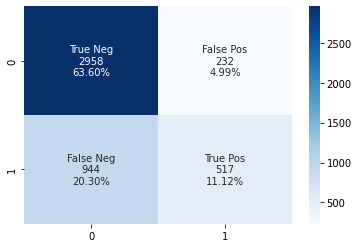

sensitivity : 0.3538672142368241, specificity : 0.9272727272727272, PPV : 0.6902536715620827, NPV : 0.7580727831881087




             ANGINA             

 Decision tree fit and display  


In [ ]:
total_accuracy = 0
decision_trees = []
for i, column in enumerate(y_col_names):
    print("\x1b[6;30;41m\033[1m", column.center(30), "\x1b[0m\033[0m\n")
    i = i + 23
    Y = data[:, i:(i+1)]
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4, random_state=42)
   
    print("\x1b[6;30;43m", "Decision tree fit and display".center(30), "\x1b[0m")
    decision_tree = DecisionTree(max_depth=DEPTH)
    decision_tree.fit(X_train, Y_train, x_col_names=x_col_names)
    decision_tree.pretty_print()
    decision_trees.append(decision_tree)
    
    print("\n\x1b[6;30;43m", "Test".center(30),"\x1b[0m")
    
    total_accuracy += prediction_analyse(X_test, Y_test)
    print("\n\n\n")
print("\x1b[6;30;42m", "Mean accuracy of all labels :".center(30), "\x1b[0m", total_accuracy / len(y_col_names))

# Evaluation on one human

In [ ]:
for i, column in enumerate(y_col_names):
    print("\x1b[6;30;41m\033[1m", column.center(30), "\x1b[0m\033[0m\n")
    decision_trees[i].predict_one_element(X_test[0]) 

In [ ]:
Y